In [20]:
library(zoo)
df = read.csv("/home/pybokeh/Downloads/ch10/SwordDemand2.csv",header=TRUE,stringsAsFactors=FALSE)

In [21]:
head(df)

,Date,Qty
1,2013-01,165
2,2013-02,171
3,2013-03,147
4,2013-04,143
5,2013-05,164
6,2013-06,160


In [22]:
str(df)

'data.frame':	36 obs. of  2 variables:
 $ Date: chr  "2013-01" "2013-02" "2013-03" "2013-04" ...
 $ Qty : int  165 171 147 143 164 160 152 150 159 169 ...


**To use the forecast package, it expects the date column to be of type time series.  Currently, it is of type chr.**

**We will convert using the as.Date() method and as.yearmon() method from the zoo package.**

In [23]:
df$Date <- as.Date(as.yearmon(df$Date))

In [24]:
str(df)

'data.frame':	36 obs. of  2 variables:
 $ Date: Date, format: "2013-01-01" "2013-02-01" ...
 $ Qty : int  165 171 147 143 164 160 152 150 159 169 ...


**The Date column is of type Date.  But we need it to be of type time series (ts).**

In [25]:
dft = ts(df$Qty,frequency=12,start=c(2013,1))

In [26]:
str(dft)

 Time-Series [1:36] from 2013 to 2016: 165 171 147 143 164 160 152 150 159 169 ...


In [27]:
dft

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
2013 165 171 147 143 164 160 152 150 159 169 173 203
2014 169 166 162 147 188 161 162 169 185 188 200 229
2015 189 218 185 199 210 193 211 208 216 218 264 304

**Now, we are ready to use the forecast package.**

In [17]:
library(forecast)
hwm = HoltWinters(dft, gamma=TRUE)
hwf = forecast.HoltWinters(hwm, h=24)
summary(hwf)


Forecast method: HoltWinters

Model Information:
Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = dft, gamma = TRUE)

Smoothing parameters:
 alpha: 0.03745919
 beta : 1
 gamma: TRUE

Coefficients:
           [,1]
a   230.1742426
b     4.9593055
s1   -0.9981753
s2   24.2319846
s3  -12.1678757
s4   -2.2389364
s5    5.2457368
s6  -15.0582677
s7   -0.7514441
s8   -7.3943043
s9   -2.6559054
s10  -3.4963232
s11  38.7850629
s12  73.8257574

Error measures:
                   ME     RMSE      MAE     MPE     MAPE      MASE        ACF1
Training set 4.213125 12.20488 9.442843 2.40332 5.363829 0.6295229 -0.09925473

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2016       234.1354 219.1399 249.1308 211.2018 257.0689
Feb 2016       264.3248 249.2874 279.3623 241.3270 287.3226
Mar 2016       232.8843 217.7527 248.0159 209.7425 256.0260
Apr 2016       247.7725 232.4750 263.0700 224.3770 271.1680
May 2016       260.216

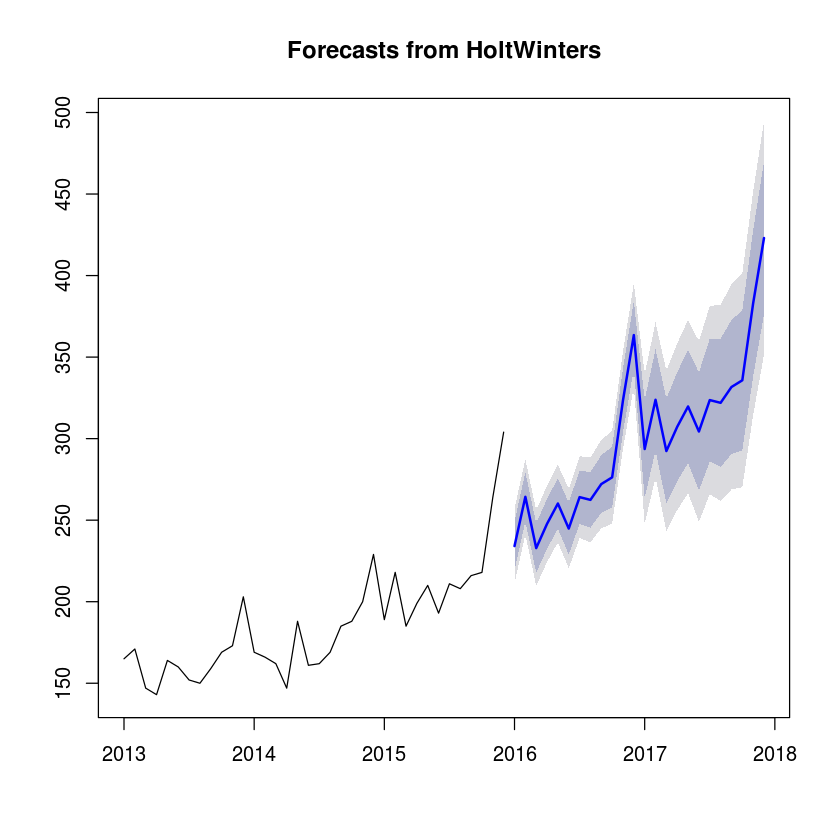

In [18]:
plot.forecast(hwf)